### Using Bidirectional LSTM to predict and training on a model

In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Flatten,Embedding,Dropout,Input,Bidirectional 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [76]:
# Read the dataset with name "Emotion_classify_Data.csv" and store it in a variable df
columns = ['id', 'country', 'Label', 'Text']
df = pd.read_csv('../Data/twitter_training.csv', names= columns)

# Print the shape of dataframe
print(df.shape)

# Print top 5 rows
df.head(5)

(74682, 4)


,id,country,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [77]:
df.columns = ("id","name","review","text")

In [78]:
df = df[['review','text']]
df = df.head(10000)

In [79]:
import re

def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove special characters, numbers, and punctuations
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\d', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.strip()
    return tweet

In [80]:
df['text'].apply(str)

0       im getting on borderlands and i will murder yo...
1       I am coming to the borders and I will kill you...
2       im getting on borderlands and i will kill you ...
3       im coming on borderlands and i will murder you...
4       im getting on borderlands 2 and i will murder ...
                              ...                        
9995    So the smaller studio version of why Xbox Seri...
9996                               Xbox looking BEAUTIFUL
9997                                 Xbox looks BEAUTIFUL
9998                               Xbox looking BEAUTIFUL
9999                                  Xbox looking around
Name: text, Length: 10000, dtype: object

In [81]:
df['text'] = df['text'].apply(str)

In [82]:
df.review.value_counts()

Positive      3208
Neutral       2634
Negative      2298
Irrelevant    1860
Name: review, dtype: int64

In [83]:
df['preprocess'] = df['text'].apply(clean_tweet)
df.head()

,review,text,preprocess
0,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...


In [84]:
le = LabelEncoder()
df['review'] = le.fit_transform(df['review'])
df

,review,text,preprocess
0,3,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,3,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,3,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,3,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...
...,...,...,...
9995,0,So the smaller studio version of why Xbox Seri...,So the smaller studio version of why Xbox Seri...
9996,3,Xbox looking BEAUTIFUL,Xbox looking BEAUTIFUL
9997,3,Xbox looks BEAUTIFUL,Xbox looks BEAUTIFUL
9998,3,Xbox looking BEAUTIFUL,Xbox looking BEAUTIFUL


In [85]:
df.preprocess.values

array(['im getting on borderlands and i will murder you all',
       'I am coming to the borders and I will kill you all',
       'im getting on borderlands and i will kill you all', ...,
       'Xbox looks BEAUTIFUL', 'Xbox looking BEAUTIFUL',
       'Xbox looking around'], dtype=object)

In [86]:
# Split features and Target
feature = np.stack(df.preprocess.values)
target = df.review

In [87]:
from sklearn.model_selection import train_test_split

# Training and Test data spliting 

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=42)
print(X_train.shape,y_train.shape,"|",X_test.shape,y_test.shape)

(8000,) (8000,) | (2000,) (2000,)


In [88]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1

X_train = pad_sequences(sequences_train, padding='post',maxlen=200)
X_test = pad_sequences(sequences_test, padding='post',maxlen=200)

In [89]:
sequences_train

[[253],
 [2,
  403,
  18,
  22,
  10,
  1213,
  1135,
  96,
  35,
  90,
  73,
  8,
  1658,
  5998,
  13,
  79,
  80,
  158,
  156],
 [150,
  70,
  777,
  4,
  17,
  51,
  4488,
  596,
  3,
  655,
  4,
  274,
  3462,
  47,
  17,
  633,
  5,
  3463,
  19,
  48,
  7,
  10,
  1659,
  4,
  2009,
  65,
  51,
  70,
  53,
  564,
  3,
  161,
  31,
  27,
  4,
  141,
  5,
  50,
  7,
  12,
  2,
  110,
  48,
  96,
  16,
  90,
  388,
  23,
  7,
  96],
 [27,
  4489,
  4490,
  525,
  65,
  213,
  4491,
  28,
  704,
  453,
  8,
  525,
  65,
  98,
  1025,
  4,
  525,
  65,
  5,
  526,
  867,
  32,
  34,
  4492,
  20,
  210,
  634,
  49,
  4493,
  778,
  268,
  29,
  349,
  52,
  13,
  11,
  388],
 [14, 10, 23, 61, 233, 162, 42, 76, 154, 729, 233, 4494, 2667, 17, 565, 597],
 [41,
  15,
  1301,
  868,
  63,
  193,
  4495,
  4,
  268,
  749,
  2,
  1660,
  76,
  131,
  2010,
  4496,
  7,
  12,
  7,
  35,
  232,
  186,
  800,
  4,
  174,
  185,
  2,
  527,
  2668,
  9,
  1508,
  12,
  14,
  10,
  4497,
  5,

### Bidirectional LSTM
This code snippet defines and compiles a **Bidirectional LSTM** model using TensorFlow's Keras API. Here's a breakdown of what each part of the code does:

### 1. **Imports**:
```python
from tensorflow.keras.optimizers import Adam
```
- **Adam optimizer**: Adam (Adaptive Moment Estimation) is a popular optimization algorithm used for training deep learning models. It is efficient and works well with sparse gradients.

### 2. **Model Architecture**:

```python
lstm_model = Sequential()
```
- **Sequential model**: This means the layers will be added one after the other in a linear stack.

```python
lstm_model.add(Input(shape=(200,)))
```
- **Input layer**: Specifies that each input sequence has a length of 200 (assuming 200 timesteps or features). You don't need to specify the batch size in the input shape, just the feature/timestep size.

```python
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=300))
```
- **Embedding layer**: Maps input tokens (like words or indices representing words) to dense 300-dimensional vectors. `vocab_size` defines the number of unique words in the vocabulary, and `output_dim=300` specifies the size of each word embedding.

```python
lstm_model.add(Bidirectional(LSTM(200)))
```
- **Bidirectional LSTM layer**: This is a recurrent layer where information is passed both forward and backward. It has 200 units, which defines the dimensionality of the output space. The model will learn from both the past and future information in the sequence.

```python
lstm_model.add(Flatten())
```
- **Flatten layer**: Converts the multidimensional output of the previous layer into a 1D vector.

```python
lstm_model.add(Dense(200, activation='relu'))
```
- **Dense layer (fully connected)**: This layer has 200 units, with the ReLU activation function, which introduces non-linearity into the model.

```python
lstm_model.add(Dropout(0.5))
```
- **Dropout layer**: Prevents overfitting by randomly setting 50% of the input units to 0 during training.

```python
lstm_model.add(Dense(4, activation='softmax'))
```
- **Output Dense layer**: Has 4 units (assuming a classification problem with 4 classes), with a softmax activation function to output probabilities for each class.

### 3. **Model Compilation**:
```python
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```
- **Optimizer**: Uses the Adam optimizer with a learning rate of 0.001.
- **Loss function**: Uses `sparse_categorical_crossentropy`, which is typically used for multi-class classification when the labels are integers (not one-hot encoded).
- **Metrics**: Tracks model performance using accuracy during training and evaluation.

### 4. **Model Summary**:
```python
lstm_model.summary()
```
- Displays the architecture of the model, including the layer types, output shapes, and the number of parameters.

### Summary:
This model is suitable for tasks like text classification where sequences (like sentences) are passed through an embedding layer, followed by a bidirectional LSTM to capture contextual information in both directions, and then dense layers for classification.

In [90]:
from tensorflow.keras.optimizers import Adam

lstm_model = Sequential()
lstm_model.add(Input(shape=(200,)))
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=300))
lstm_model.add(Bidirectional(LSTM(200)))
lstm_model.add(Flatten())
lstm_model.add(Dense(200, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(4, activation='softmax'))

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 300)       │     2,423,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 400)            │       801,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,704 (12.61 MB)

 Trainable params: 3,305,704 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
history = lstm_model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 81s 456ms/step - accuracy: 0.4011 - loss: 1.2734 - val_accuracy: 0.7354 - val_loss: 0.7295
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 94s 538ms/step - accuracy: 0.8412 - loss: 0.4521 - val_accuracy: 0.8421 - val_loss: 0.4429
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 98s 560ms/step - accuracy: 0.9311 - loss: 0.1952 - val_accuracy: 0.8813 - val_loss: 0.3730
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 89s 511ms/step - accuracy: 0.9521 - loss: 0.1378 - val_accuracy: 0.8800 - val_loss: 0.3797
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 84s 483ms/step - accuracy: 0.9605 - loss: 0.0997 - val_accuracy: 0.8871 - val_loss: 0.4042
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 90s 517ms/step - accuracy: 0.9678 - loss: 0.0875 - val_accuracy: 0.8633 - val_loss: 0.4265
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 90s 512ms/step - accuracy: 0.9699 - loss: 0.0845 - val_accuracy: 0.8813 - val_loss: 0.4981
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 91s 518ms/step - accuracy: 0.9652 - loss: 0

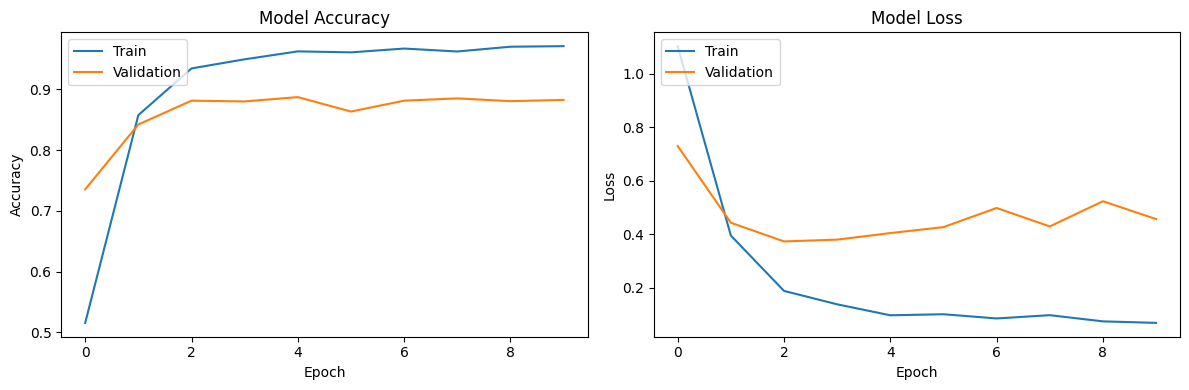

In [94]:
# Visualise Accuracy and Losses

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [95]:
sample_text = df['text'][5]

tokenizer.fit_on_texts(sample_text)
sample_text = tokenizer.texts_to_sequences([sample_text])

sample_text = pad_sequences(sample_text, padding='post', maxlen=300)

predictions = lstm_model.predict(sample_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


In [97]:
np.argmax(predictions)

3

### Creating Pickle files for the tokenizer and the 

In [92]:
import pickle

# Save the model architecture and weights as an .h5 file
lstm_model.save('lstm_model.h5')

# Save your training history (optional)
with open('lstm_model_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [93]:
import pickle

# Save the tokenizer to a pickle file
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

Mapping of original values to encoded values:
Irrelevant: 0
Negative: 1
Neutral: 2
Positive: 3
